# Problem Statement

Customer Churn is a burning problem for Telecom companies. Almost every telecom company pays a premium to get a customer on-board. Customer churn is a directly impacts company’s revenue.
  
In this case-study, we simulate one such case of customer churn where we work on a data of post-paid customers with a contract. The data has information about customer usage behaviour, contract details, and payment details. The data also indicates which were the customers who cancelled their service.  
  
Based on this past data, Perform an EDA and build a model which can predict whether a customer will cancel their service in the future or not.

# Data Dictionary

* <b>Churn</b> - 1 if customer cancelled service, 0 if not
* <b>AccountWeeks</b> - number of weeks customer has had active account
* <b>ContractRenewal</b> - 1 if customer recently renewed contract, 0 if not
* <b>DataPlan</b> - 1 if customer has data plan, 0 if not
* <b>DataUsage</b> - gigabytes of monthly data usage
* <b>CustServCalls</b> - number of calls into customer service
* <b>DayMins</b> - average daytime minutes per month
* <b>DayCalls</b> - average number of daytime calls
* <b>MonthlyCharge</b> - average monthly bill
* <b>OverageFee</b> - largest overage fee in last 12 months
* <b>RoamMins</b> - average number of roaming minutes


In [57]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [58]:
cell_df = pd.read_csv("Trucks.csv")

## EDA

In [59]:
cell_df.head()

,Unnamed: 0,Freq,period,parked,light,collision
0,1,712,0,1,1,0
1,2,613,1,1,1,0
2,3,192,0,1,1,1
3,4,179,1,1,1,1
4,5,2557,0,0,1,0


In [60]:
cell_df=cell_df.drop("Unnamed: 0", axis=1)

In [61]:
cell_df.head()

,Freq,period,parked,light,collision
0,712,0,1,1,0
1,613,1,1,1,0
2,192,0,1,1,1
3,179,1,1,1,1
4,2557,0,0,1,0


In [62]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Freq       24 non-null     int64
 1   period     24 non-null     int64
 2   parked     24 non-null     int64
 3   light      24 non-null     int64
 4   collision  24 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [63]:
cell_df.describe()

,Freq,period,parked,light,collision
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1448.916667,0.500000,0.500000,0.333333,0.500000
std,2794.132578,0.510754,0.510754,0.481543,0.510754
min,39.000000,0.000000,0.000000,0.000000,0.000000
25%,188.750000,0.000000,0.000000,0.000000,0.000000
50%,536.500000,0.500000,0.500000,0.000000,0.500000
75%,994.750000,1.000000,1.000000,1.000000,1.000000
max,10749.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
cell_df['period'].value_counts()

1    12
0    12
Name: period, dtype: int64

In [65]:
cell_df['parked'].value_counts()

1    12
0    12
Name: parked, dtype: int64

In [66]:
cell_df['light'].value_counts()

0    16
1     8
Name: light, dtype: int64

In [67]:
cell_df['collision'].value_counts()

1    12
0    12
Name: collision, dtype: int64

In [68]:
cell_df.corr()

,Freq,period,parked,light,collision
Freq,1.000000,-0.034152,-4.230794e-01,5.025354e-01,0.240132
period,-0.034152,1.000000,0.000000e+00,0.000000e+00,0.000000
parked,-0.423079,0.000000,1.000000e+00,-2.943923e-17,0.000000
light,0.502535,0.000000,-2.943923e-17,1.000000e+00,0.000000
collision,0.240132,0.000000,0.000000e+00,0.000000e+00,1.000000


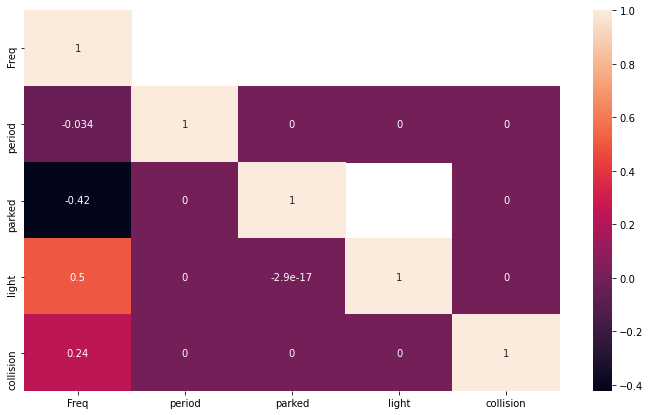

In [69]:
plt.figure(figsize=(12,7))
sns.heatmap(cell_df.corr(), annot=True,mask=np.triu(cell_df.corr(),+1));

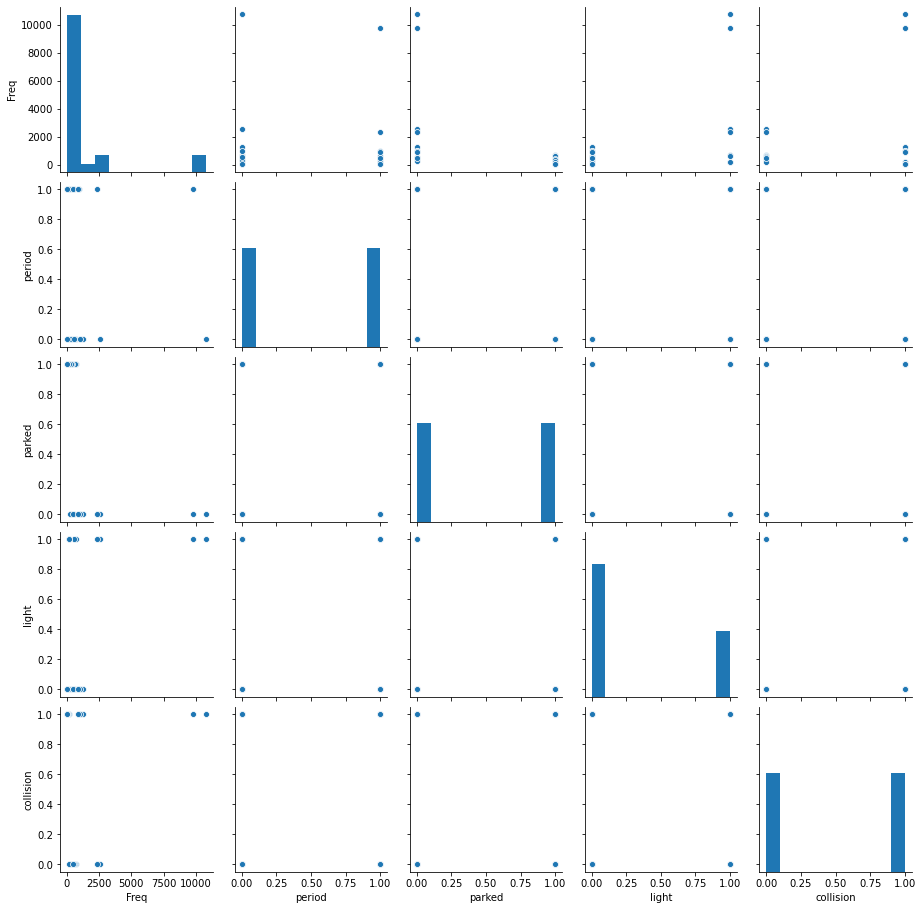

In [70]:
sns.pairplot(cell_df ,diag_kind='hist')

### Check for Missing values

In [71]:
cell_df.isnull().sum()

Freq         0
period       0
parked       0
light        0
collision    0
dtype: int64

### Checking for Duplicates

In [72]:
# Are there any duplicates ?
dups = cell_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Proportion in the Target classes

In [73]:
cell_df.collision.value_counts(normalize=True)

1    0.5
0    0.5
Name: collision, dtype: float64

### Distribution of the variables Check

In [74]:
from pylab import rcParams

In [75]:
rcParams['figure.figsize'] = 15,8

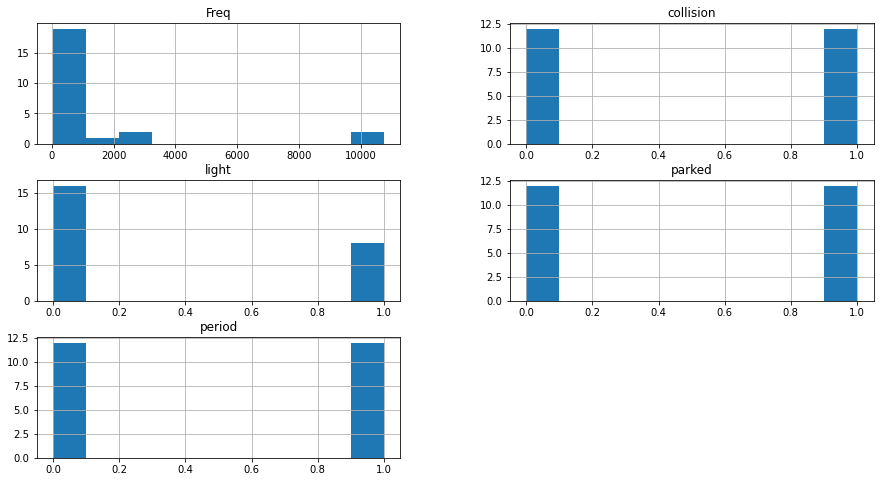

In [76]:
cell_df.hist();

### Outlier Checks

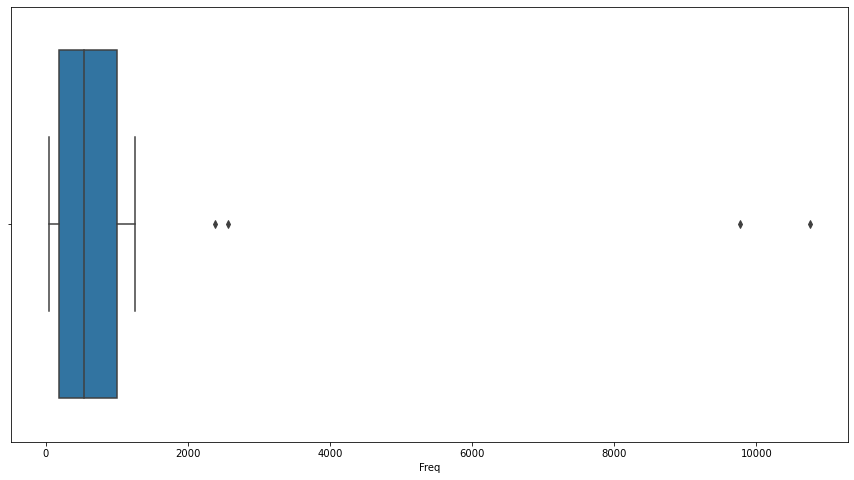

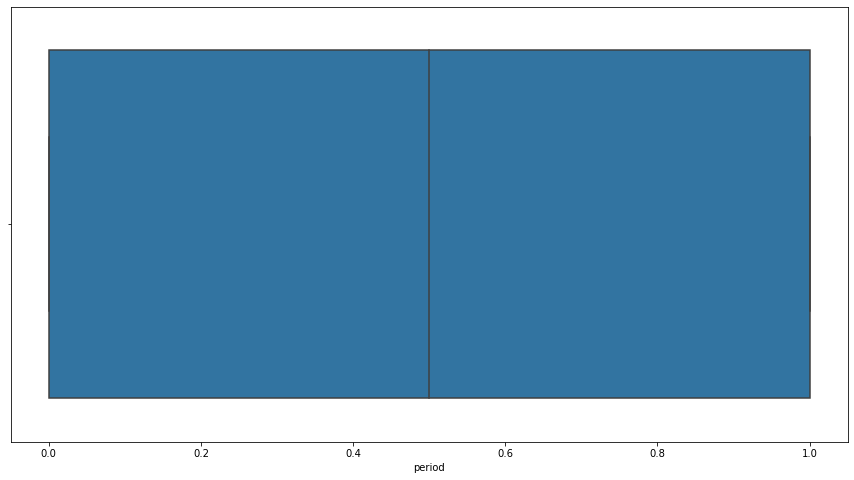

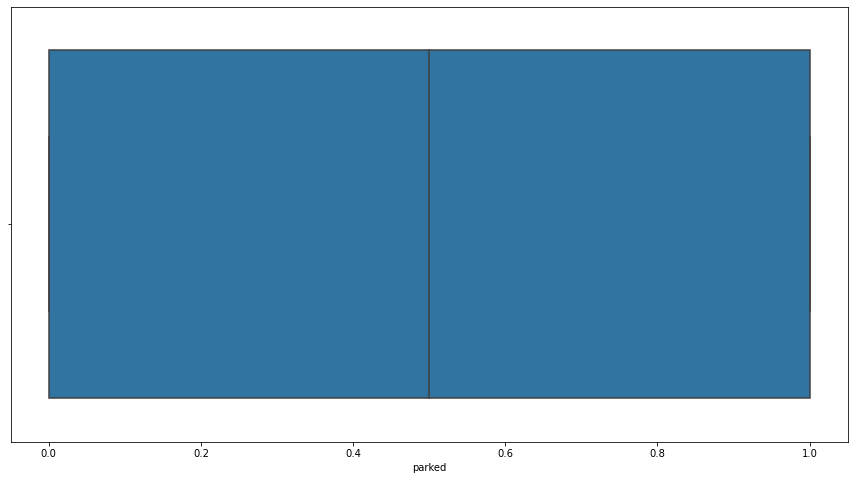

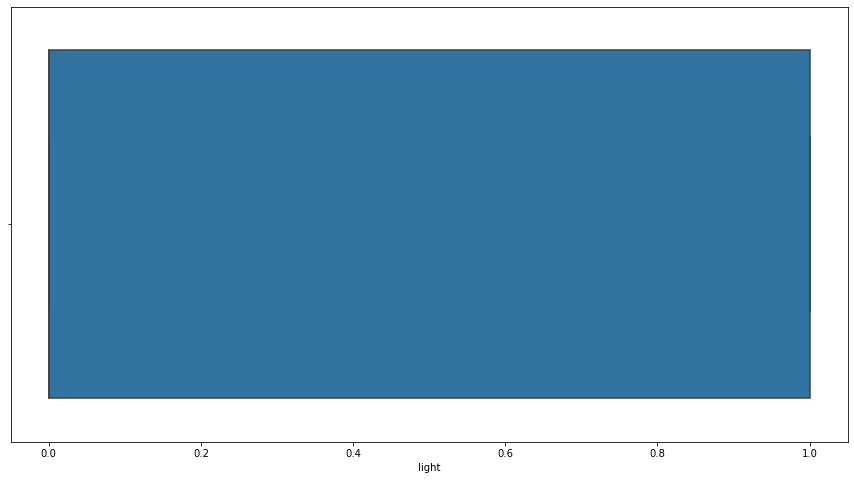

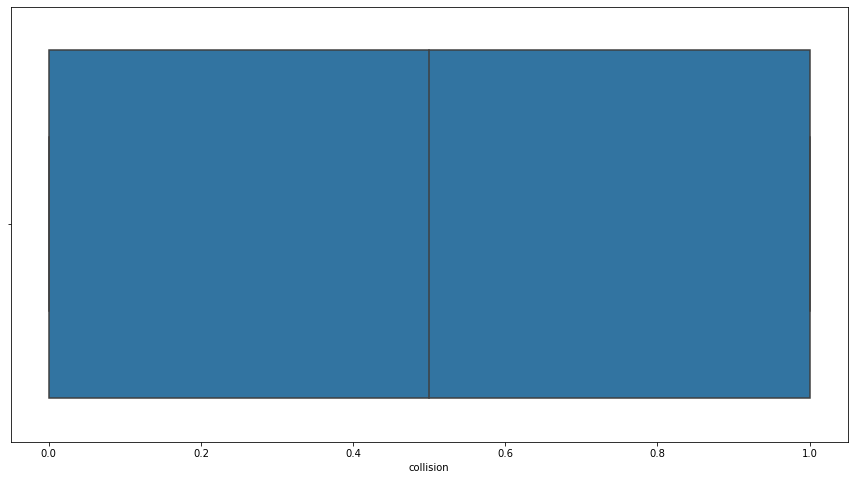

In [77]:
cols=cell_df.columns

for i in cols:
    sns.boxplot(cell_df[i])
    plt.show()


Although outliers exists as per the boxplot, by looking at the data distribution in describe(), the values are not too far away. 
Treating the outliers by converting them to min/max values will cause most variables to have values to be the same. So, outliers are not treated in this case

In [78]:
cell_df.columns

Index(['Freq', 'period', 'parked', 'light', 'collision'], dtype='object')

### Bi-Variate Analysis with Target variable

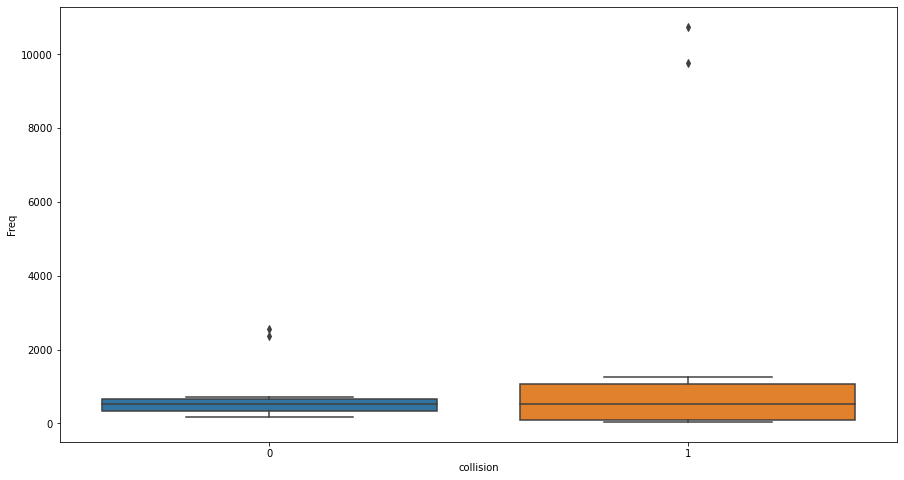

In [79]:
sns.boxplot(cell_df['collision'],cell_df['Freq']);

AccountWeeks shows similar distribution between churn and no churn, and is normally distributed

### Train (100%) - Test (0%) Split

In [80]:
# Creating a copy of the original data frame
df = cell_df.copy()

In [81]:
df.head()

,Freq,period,parked,light,collision
0,712,0,1,1,0
1,613,1,1,1,0
2,192,0,1,1,1
3,179,1,1,1,1
4,2557,0,0,1,0


In [85]:
X = df.drop('collision',axis=1)
Y = df.pop('collision')

In [86]:
print('Number of rows and columns of the training set for the independent variables:',X.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y.shape)

Number of rows and columns of the training set for the independent variables: (24, 4)
Number of rows and columns of the test set for the dependent variable: (24,)


### LDA Model

In [87]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)

### Prediction

In [88]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X)

### Training Data and Test Data Confusion Matrix Comparison

Text(0.5, 1.0, 'Training Data')

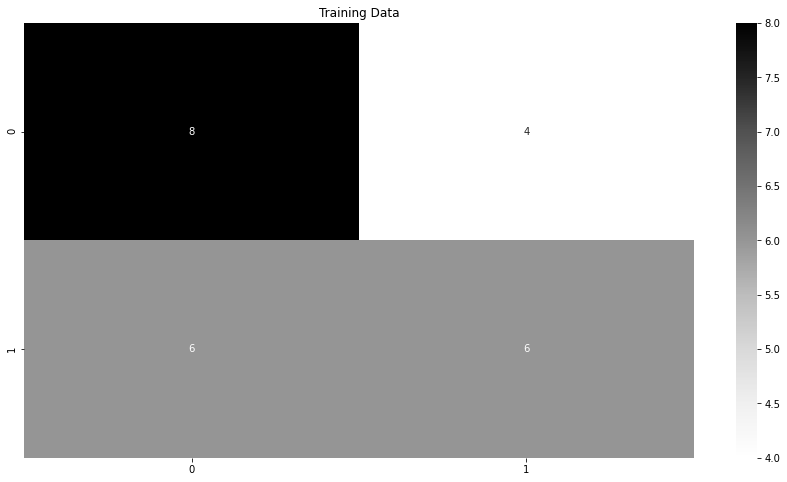

In [90]:
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')



### Training Data and Test Data Classification Report Comparison

In [92]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y,pred_class_train),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.60      0.50      0.55        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24
 



### Probability prediction for the training and test data

In [93]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X)


In [94]:
pred_prob_train[:,1]

array([0.37503374, 0.38155746, 0.33739961, 0.34978023, 0.34097427,
       0.34117537, 0.87304772, 0.84255614, 0.59521676, 0.59246188,
       0.55363067, 0.56505977, 0.39103596, 0.40198056, 0.46283408,
       0.45638919, 0.57304954, 0.57465851, 0.54980338, 0.5638175 ,
       0.41029564, 0.41809875, 0.44420787, 0.44840914])

AUC for the Training Data: 0.625


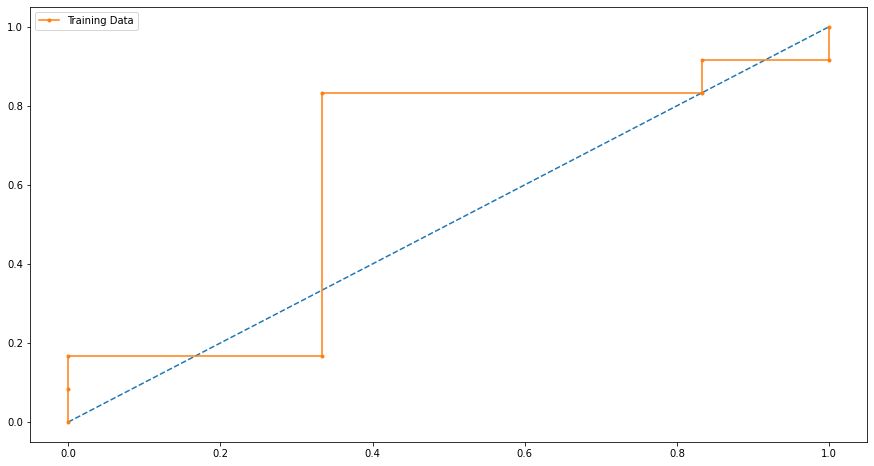

In [95]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


plt.legend(loc='best')
plt.show()

# Conclusion

The model accuracy on the training as well as the test set is about 85%, which is roughly the same proportion as the class 0 observations in the dataset. 
This model is affected by a class imbalance problem.
Since we only have 3333 observations, if re-build the same LDA model with more number of data points, an even better model could be built.  

Please do go ahead ad try to build other classification algorithms learnt so far in the course and compare the performances of those.

# How to change the cut-off values for maximum accuracy?

We will do this exercise only on the training data.

0.1 

Accuracy Score 0.5
F1 Score 0.6667 

Confusion Matrix


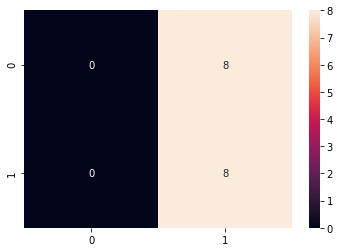

0.2 

Accuracy Score 0.5625
F1 Score 0.6957 

Confusion Matrix


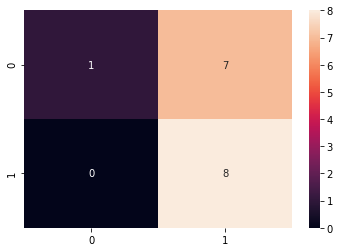

0.3 

Accuracy Score 0.5625
F1 Score 0.6667 

Confusion Matrix


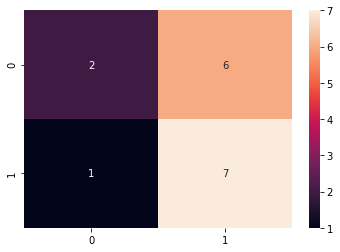

0.4 

Accuracy Score 0.6875
F1 Score 0.7059 

Confusion Matrix


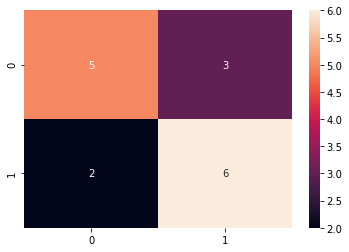

0.5 

Accuracy Score 0.6875
F1 Score 0.7059 

Confusion Matrix


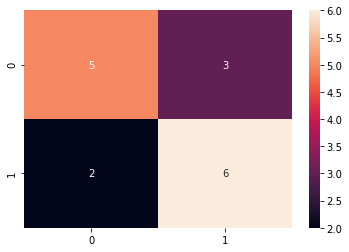

0.6 

Accuracy Score 0.75
F1 Score 0.7143 

Confusion Matrix


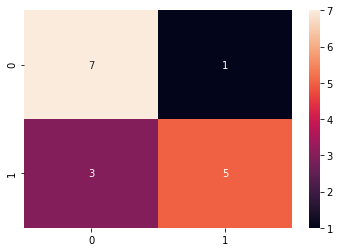

0.7 

Accuracy Score 0.5625
F1 Score 0.3636 

Confusion Matrix


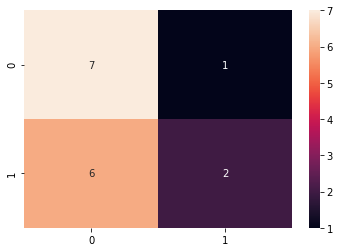

0.8 

Accuracy Score 0.625
F1 Score 0.4 

Confusion Matrix


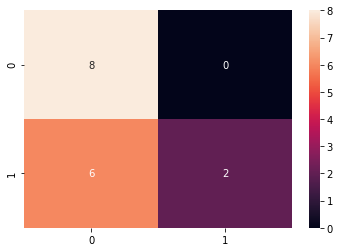

0.9 

Accuracy Score 0.5
F1 Score 0.0 

Confusion Matrix


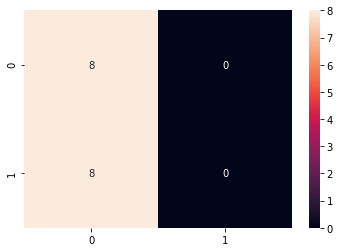

In [34]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

We see that 0.7 and 0.8 gives better accuracy than the rest of the custom cut-off values. But 0.2 cut-off gives us the best 'f1-score'. Here, we will take the cut-off as 0.2 to get the optimum 'f1' score.

Let us evaluate the predictions of the test data using these cut-off values.

In [35]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

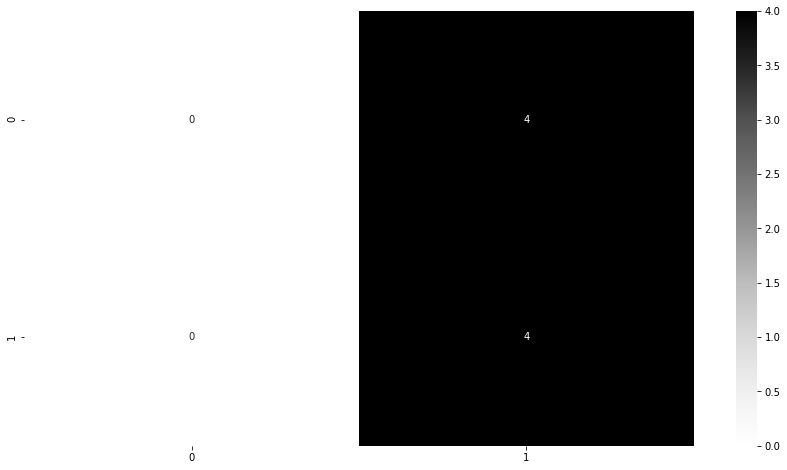

In [36]:
sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [37]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      0.75      0.55         4

    accuracy                           0.38         8
   macro avg       0.21      0.38      0.27         8
weighted avg       0.21      0.38      0.27         8
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      1.00      0.67         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8
 



C:\Users\Rachit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# no scaling

In [42]:
model1=clf.fit(X_train,Y_train)
model1

LinearDiscriminantAnalysis()

In [43]:
pred_class = model1.predict(X_test)

In [46]:
print(classification_report(Y_test, pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      0.75      0.55         4

    accuracy                           0.38         8
   macro avg       0.21      0.38      0.27         8
weighted avg       0.21      0.38      0.27         8



# scaling

In [47]:
X_scaledtrain=scale(X_train)

In [48]:
model2=clf.fit(X_scaledtrain,Y_train)
model2

LinearDiscriminantAnalysis()

In [49]:
pred_class2 = model2.predict(scale(X_test))

In [50]:
print(classification_report(Y_test, pred_class2))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.40      0.50      0.44         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      0.37         8

